# Hamoye Quiz Stage-A

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<b>Dataset Information</b>
The data consists of the following columns:

* 'Record_id' : record id

* 'Utility_id_ferc1': Utility id assigned by the FERC

'Report_year': year of report

'Plant_name_ferc1': the name of the plant

'Fuel_type_code_pudl': the type of fuel

'Fuel_unit': the unit of fuel

'Fuel_qty_burned': the quantity of fuel burned

'Fuel_mmbtu_per_unit': the measure of energy per unit

'fuel_cost_per_unit_burned': the fuel cost per unit burned

'Fuel_cost_per_unit_delivered': the cost of fuel delivered per unit

'fuel_cost_per_mmbtu': the cost of fuel per mmbtu

In [2]:
path='https://raw.githubusercontent.com/WalePhenomenon/climate_change/master/fuel_ferc1.csv'
df = pd.read_csv(path)
df.head()

,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
0,f1_fuel_1994_12_1_0_7,1,1994,rockport,coal,ton,5377489.0,16.590,18.59,18.53,1.121
1,f1_fuel_1994_12_1_0_10,1,1994,rockport total plant,coal,ton,10486945.0,16.592,18.58,18.53,1.120
2,f1_fuel_1994_12_2_0_1,2,1994,gorgas,coal,ton,2978683.0,24.130,39.72,38.12,1.650
3,f1_fuel_1994_12_2_0_7,2,1994,barry,coal,ton,3739484.0,23.950,47.21,45.99,1.970
4,f1_fuel_1994_12_2_0_10,2,1994,chickasaw,gas,mcf,40533.0,1.000,2.77,2.77,2.570


### Question 1.

In [3]:
A=[1,2,3,4,5,6]
B=[13, 21, 34]

In [4]:
A.extend(B)
A

[1, 2, 3, 4, 5, 6, 13, 21, 34]

In [5]:
A.append(B) #This output is not correct as per question asked
A

[1, 2, 3, 4, 5, 6, 13, 21, 34, [13, 21, 34]]

### Question 2.

In [6]:
a=np.eye(3) #Have to use numpy with eye function for identity metrix
a

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [7]:
np.identity(3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [8]:
#np.array[(1,0,0),(0,1,0),(0,0,1)]

In [9]:
#np.array([1,0,0],[0,1,0,][0,0,1])

### Question 3.

In [10]:
fule_code=df[["fuel_type_code_pudl","fuel_cost_per_unit_burned"]]
fule_code.head()

,fuel_type_code_pudl,fuel_cost_per_unit_burned
0,coal,18.59
1,coal,18.58
2,coal,39.72
3,coal,47.21
4,gas,2.77


In [11]:
fuel_avg=fule_code.groupby(['fuel_type_code_pudl']).mean()
fuel_avg.head()

,fuel_cost_per_unit_burned
fuel_type_code_pudl,
coal,67.421830
gas,13.659397
nuclear,4955.157002
oil,168.877086
other,18.253856


<b> gas has lowest cost</b>

### Question 4.

In [12]:
df.describe()

,utility_id_ferc1,report_year,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
count,29523.000000,29523.000000,2.952300e+04,29523.000000,29523.000000,2.952300e+04,29523.000000
mean,118.601836,2005.806050,2.622119e+06,8.492111,208.649031,9.175704e+02,19.304354
std,74.178353,7.025483,9.118004e+06,10.600220,2854.490090,6.877593e+04,2091.540939
min,1.000000,1994.000000,1.000000e+00,0.000001,-276.080000,-8.749370e+02,-41.501000
25%,55.000000,2000.000000,1.381700e+04,1.024000,5.207000,3.778500e+00,1.940000
50%,122.000000,2006.000000,2.533220e+05,5.762694,26.000000,1.737100e+01,4.127000
75%,176.000000,2012.000000,1.424034e+06,17.006000,47.113000,4.213700e+01,7.745000
max,514.000000,2018.000000,5.558942e+08,341.260000,139358.000000,7.964521e+06,359278.000000


### Question 5.

In [13]:
df["fuel_qty_burned"].skew()

15.851495469109503

In [14]:
df["fuel_qty_burned"].kurtosis()

651.3694501337732

### Question 6.

In [15]:
def missing_vals(df):
    mis_val=df.isnull().sum()
    mis_per=100*mis_val/len(df)
    mis_table=pd.concat([mis_val,mis_per],axis=1)
    mis_table=mis_table.rename(columns={0:'missing values',1:'missing percent'})
    mis_table=mis_table[mis_table.iloc[:,1] != 0].sort_values('missing percent',ascending=False).round(1)
    return mis_table
missing_vals(df).head()

,missing values,missing percent
fuel_unit,180,0.6


### Question 7.

In [16]:
df.isnull().sum()

record_id                         0
utility_id_ferc1                  0
report_year                       0
plant_name_ferc1                  0
fuel_type_code_pudl               0
fuel_unit                       180
fuel_qty_burned                   0
fuel_mmbtu_per_unit               0
fuel_cost_per_unit_burned         0
fuel_cost_per_unit_delivered      0
fuel_cost_per_mmbtu               0
dtype: int64

Missing values is categorical values so mode is used

### Question 8.

In [17]:
df.corr()

,utility_id_ferc1,report_year,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
utility_id_ferc1,1.000000,0.093323,-0.057447,-0.066946,-0.037863,-0.016414,0.006122
report_year,0.093323,1.000000,0.012952,-0.110853,0.013599,-0.014043,0.010261
fuel_qty_burned,-0.057447,0.012952,1.000000,-0.080946,-0.018535,-0.003551,-0.001896
fuel_mmbtu_per_unit,-0.066946,-0.110853,-0.080946,1.000000,-0.010034,-0.009039,-0.005884
fuel_cost_per_unit_burned,-0.037863,0.013599,-0.018535,-0.010034,1.000000,0.011007,-0.000437
fuel_cost_per_unit_delivered,-0.016414,-0.014043,-0.003551,-0.009039,0.011007,1.000000,-0.000109
fuel_cost_per_mmbtu,0.006122,0.010261,-0.001896,-0.005884,-0.000437,-0.000109,1.000000


### Question 9.

In [18]:
df_coal=df[df["fuel_type_code_pudl"]=="coal"]
df_coal.head()

,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
0,f1_fuel_1994_12_1_0_7,1,1994,rockport,coal,ton,5377489.0,16.590,18.59,18.53,1.121
1,f1_fuel_1994_12_1_0_10,1,1994,rockport total plant,coal,ton,10486945.0,16.592,18.58,18.53,1.120
2,f1_fuel_1994_12_2_0_1,2,1994,gorgas,coal,ton,2978683.0,24.130,39.72,38.12,1.650
3,f1_fuel_1994_12_2_0_7,2,1994,barry,coal,ton,3739484.0,23.950,47.21,45.99,1.970
5,f1_fuel_1994_12_2_0_13,2,1994,e. c. gaston-unit 5,coal,ton,2124933.0,23.922,44.24,43.25,1.850


In [19]:
df_coal=df_coal[["report_year","fuel_cost_per_unit_burned"]]
df_coal.head()

,report_year,fuel_cost_per_unit_burned
0,1994,18.59
1,1994,18.58
2,1994,39.72
3,1994,47.21
5,1994,44.24


In [20]:
a=df_coal.groupby(['report_year']).sum()
a.head()

,fuel_cost_per_unit_burned
report_year,
1994,14984.572
1995,14571.785
1996,12694.803
1997,43742.178
1998,11902.597


In [21]:
a.reset_index(inplace=True)
a.head()

,report_year,fuel_cost_per_unit_burned
0,1994,14984.572
1,1995,14571.785
2,1996,12694.803
3,1997,43742.178
4,1998,11902.597


In [22]:
final=a[a["report_year"]==1998]
final["fuel_cost_per_unit_burned"].reset_index(drop=True,inplace=True)

In [23]:
initial=a[a["report_year"]==1994]
initial["fuel_cost_per_unit_burned"].reset_index(drop=True,inplace=True)

In [24]:
percentage_change=(100*(final["fuel_cost_per_unit_burned"]-initial["fuel_cost_per_unit_burned"])/(initial["fuel_cost_per_unit_burned"]))

In [25]:
percentage_change

0   -20.567655
Name: fuel_cost_per_unit_burned, dtype: float64

### Question 10.

In [26]:
df_cost=df[["report_year","fuel_cost_per_unit_delivered"]]
df_cost.head(2)

,report_year,fuel_cost_per_unit_delivered
0,1994,18.53
1,1994,18.53


In [27]:
avg=df_cost.groupby(['report_year']).mean()
avg.head()

,fuel_cost_per_unit_delivered
report_year,
1994,63.636060
1995,32.735269
1996,9196.705948
1997,11140.197239
1998,287.154420


In [28]:
avg["fuel_cost_per_unit_delivered"].max()


11140.19723948813

In [29]:
year=avg[avg["fuel_cost_per_unit_delivered"]==11140.19723948813]
year

,fuel_cost_per_unit_delivered
report_year,
1997,11140.197239


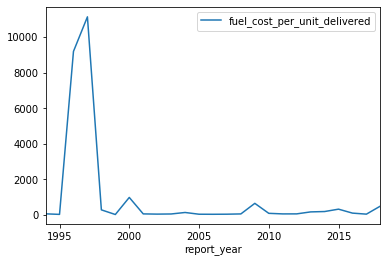

In [30]:
avg.plot()